In [1]:
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

In [2]:
# !cp -n /archive/gold/datasets/topography/GEBCO_08_v2.nc .
with netCDF4.Dataset('GEBCO_2023.nc') as nc:
    Gtopo_lon = nc.variables['lon'][:].filled(0.)
    Gtopo_lat = nc.variables['lat'][:].filled(0.)
    Gtopo_depth = -nc.variables['elevation'][:,:].filled(0.)

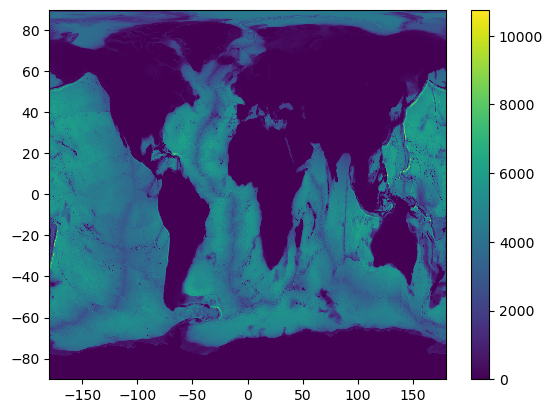

In [3]:
plt.pcolormesh( Gtopo_lon[::30], Gtopo_lat[::30], Gtopo_depth[::30,::30] , vmin=0 ); plt.colorbar();

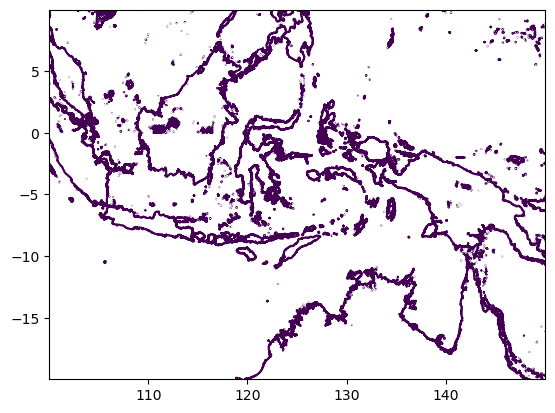

In [4]:
def Gss( west, east, south, north ):
    rdlon, rdlat = len(Gtopo_lon)/360, len(Gtopo_lat)/180
    iW = np.mod((west+180)*rdlon, len(Gtopo_lon)).astype(int)
    iE = np.mod((east+180)*rdlon, len(Gtopo_lon)).astype(int)
    jS = np.mod((south+90)*rdlat, len(Gtopo_lat)).astype(int)
    jN = np.mod((north+90)*rdlat, len(Gtopo_lat)).astype(int)
    return Gtopo_lon[iW:iE], Gtopo_lat[jS:jN], Gtopo_depth[jS:jN,iW:iE]
plt.contour( *Gss(100,150,-20,10), levels=[0] );

In [5]:
# Model mesh
with netCDF4.Dataset('OM5_ocean_hgrid.nc') as nc:
    Mlon = nc.variables['x'][::2,::2]
    Mlat = nc.variables['y'][::2,::2]

In [6]:
# Old OM5 topography
with netCDF4.Dataset('/archive/bgr/Datasets/OM5/OM5_025_noEditsTopo_v23.11.29/ocean_topog.nc') as nc:
    Otopo = nc.variables['depth'][:]
    Oh2 = nc.variables['depth'][:]
Oh2[ Otopo<=0 ] = 0
# Otopo[ Otopo<=0 ] = np.nan

In [7]:
def sq(A):
    B = 1*A
    B[A==0] = np.nan
    return B

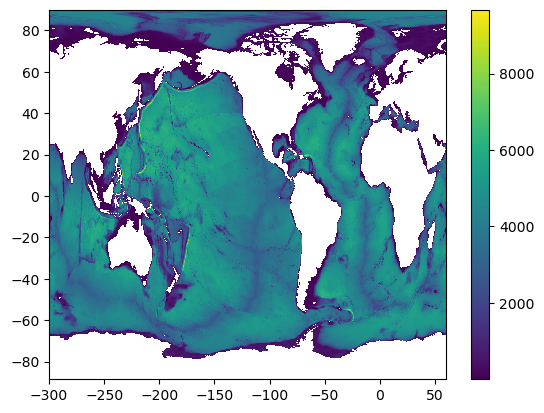

In [8]:
plt.pcolormesh( Mlon, Mlat, sq(Otopo) ); plt.colorbar();

In [9]:
with netCDF4.Dataset('new_topo_OM5_grid_r7_6x387.nc') as nc:
    Ntopo = nc.variables['depth'][:]
    Nh2 = nc.variables['depth'][:]
Nh2[ Ntopo<=0 ] = 0
Ntopo[ Ntopo<=0 ] = 0 #np.nan

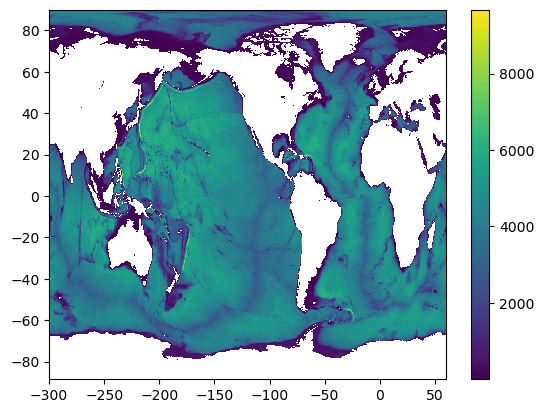

In [10]:
plt.pcolormesh( Mlon, Mlat, sq(Ntopo) ); plt.colorbar();

# Indonesia

In [11]:
i0,i1,j0,j1 = 250,300,560,600

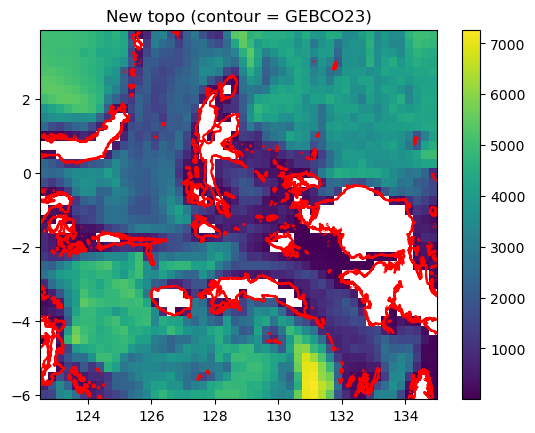

In [12]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1]+360, Mlat[j0:j1+1,i0:i1+1], sq(Ntopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New topo (contour = GEBCO23)');

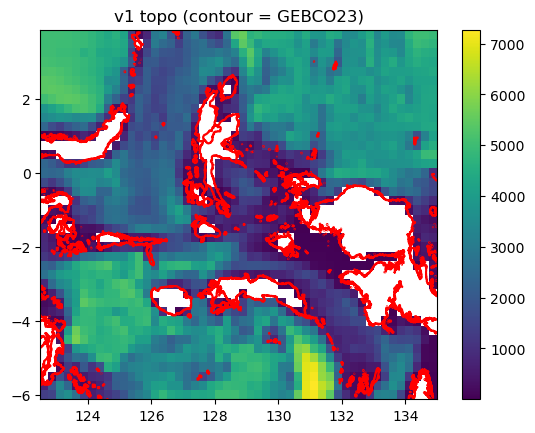

In [13]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1]+360, Mlat[j0:j1+1,i0:i1+1], sq(Otopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('v1 topo (contour = GEBCO23)');

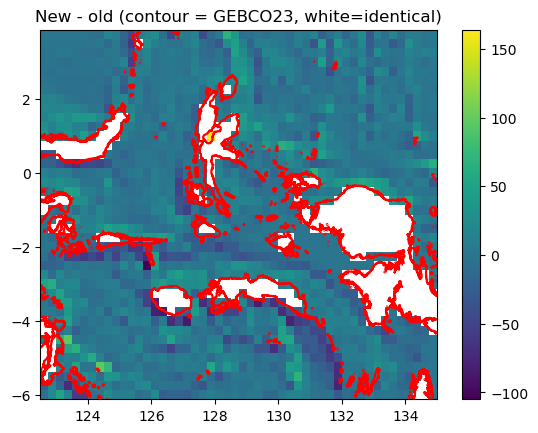

In [14]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1]+360, Mlat[j0:j1+1,i0:i1+1], sq(Ntopo[j0:j1,i0:i1] - Otopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New - old (contour = GEBCO23, white=identical)');

In [15]:
i0,i1,j0,j1 = 260,285,575,597

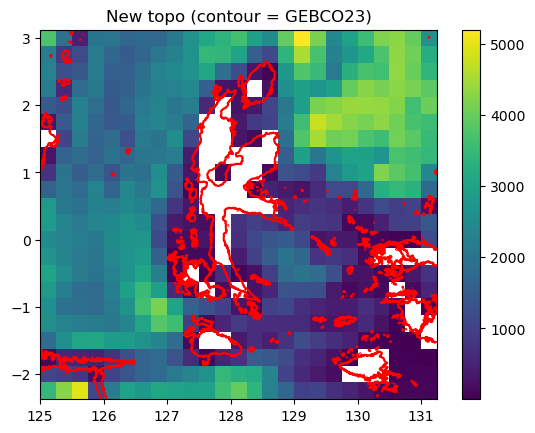

In [16]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1]+360, Mlat[j0:j1+1,i0:i1+1], sq(Ntopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New topo (contour = GEBCO23)');

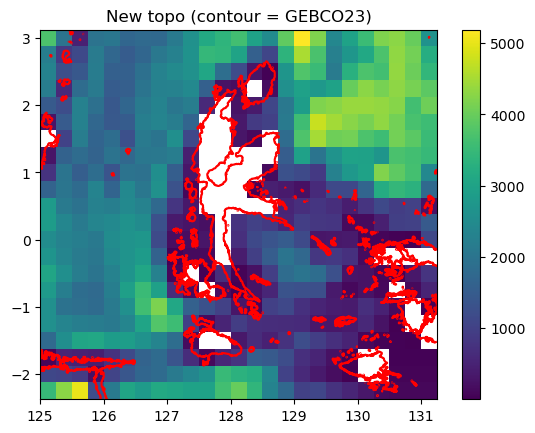

In [17]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1]+360, Mlat[j0:j1+1,i0:i1+1], sq(Otopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New topo (contour = GEBCO23)');

# Svalbard

In [18]:
i0,i1,j0,j1 = 1165,1250,1060,1110

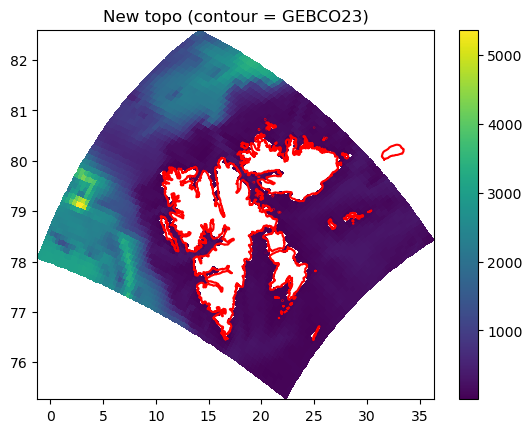

In [19]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], sq(Ntopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New topo (contour = GEBCO23)');

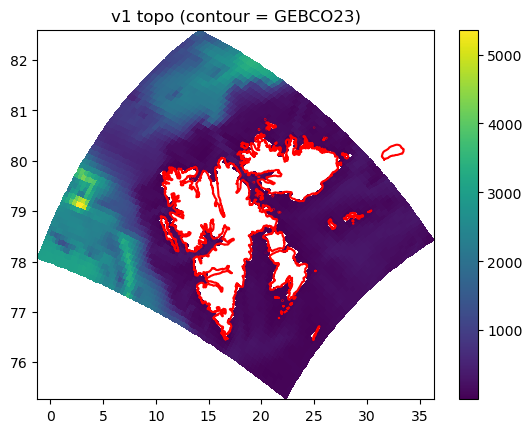

In [20]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], sq(Otopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('v1 topo (contour = GEBCO23)');

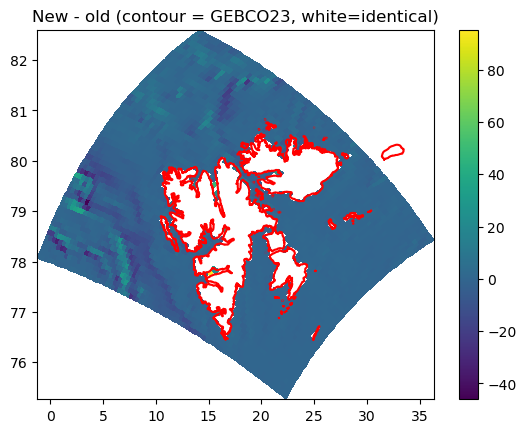

In [21]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], sq(Ntopo[j0:j1,i0:i1] - Otopo[j0:j1,i0:i1]) ); plt.colorbar();
xx,yy = plt.xlim(), plt.ylim()
plt.contour( *Gss( xx[0], xx[1], yy[0], yy[1] ), levels=[0], colors='r' );
plt.title('New - old (contour = GEBCO23, white=identical)');

# Roughness

In [22]:
i0,i1,j0,j1 = 940,1239,320,500

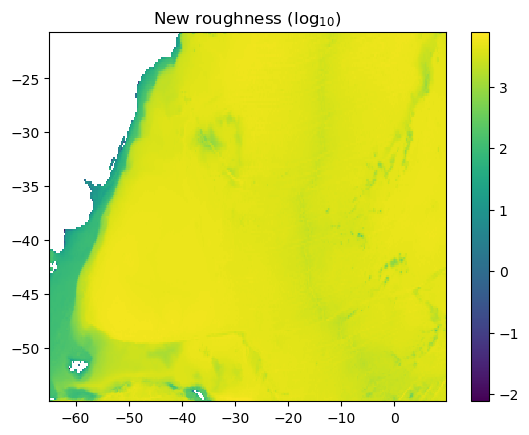

In [23]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], np.log10( sq(Nh2[j0:j1,i0:i1]) ) ); plt.colorbar();
plt.title('New roughness (log$_{10}$)');

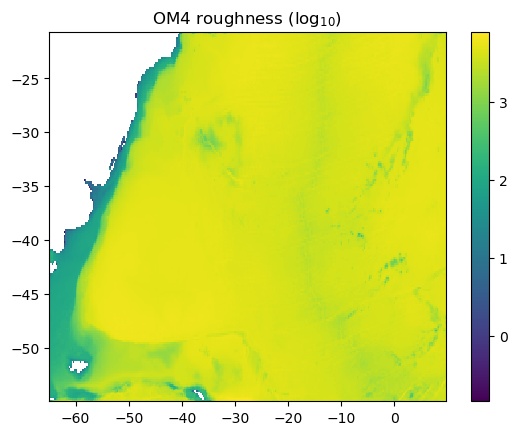

In [24]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], np.log10( sq(Oh2[j0:j1,i0:i1]) ) ); plt.colorbar();
plt.title('OM4 roughness (log$_{10}$)');

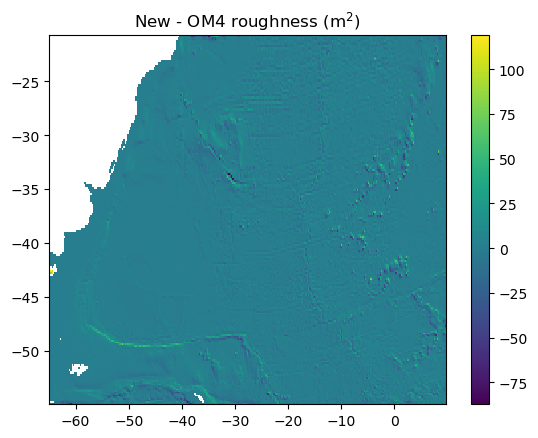

In [25]:
plt.pcolormesh( Mlon[j0:j1+1,i0:i1+1], Mlat[j0:j1+1,i0:i1+1], sq( Nh2[j0:j1,i0:i1] - Oh2[j0:j1,i0:i1] ) ); plt.colorbar();
plt.title('New - OM4 roughness (m$^2$)');